In [ ]:
##Dask es para trabajar de manera distribuida 
# 

In [4]:
! pip install dask[complete]

In [1]:
import dask
from time import sleep 
import dask.delayed

In [2]:
def calcular_cuadrado (x):
     sleep(1)
     x = x**2
     return x

def suma(a, b):
     sleep(1)
     return a + b 


In [3]:
%%time 
x = calcular_cuadrado(10)
y = calcular_cuadrado(10)
z = suma(10,11)

CPU times: user 1.36 ms, sys: 0 ns, total: 1.36 ms
Wall time: 3 s


In [9]:
%%time
x = dask.delayed(calcular_cuadrado)(10)
y = dask.delayed(calcular_cuadrado)(15)
z = dask.delayed(suma)(x, y)

print(z)



Delayed('suma-7db9d44c-0198-4627-a1f1-8d696de109ea')
CPU times: user 629 µs, sys: 114 µs, total: 743 µs
Wall time: 915 µs


In [10]:
!pip install graphviz

In [12]:
%%time
z.compute()

CPU times: user 2.09 ms, sys: 1.03 ms, total: 3.12 ms
Wall time: 2 s


325

In [20]:
from dask import delayed

In [26]:
%%time
output = []
for i in range(5):
    a = delayed(calcular_cuadrado)(i)
    b = delayed(calcular_cuadrado)(i+5)
    c = delayed(sum)(a,b)
    output.append(c)

total = delayed(sum)(output)

    

CPU times: user 1.64 ms, sys: 0 ns, total: 1.64 ms
Wall time: 1.38 ms


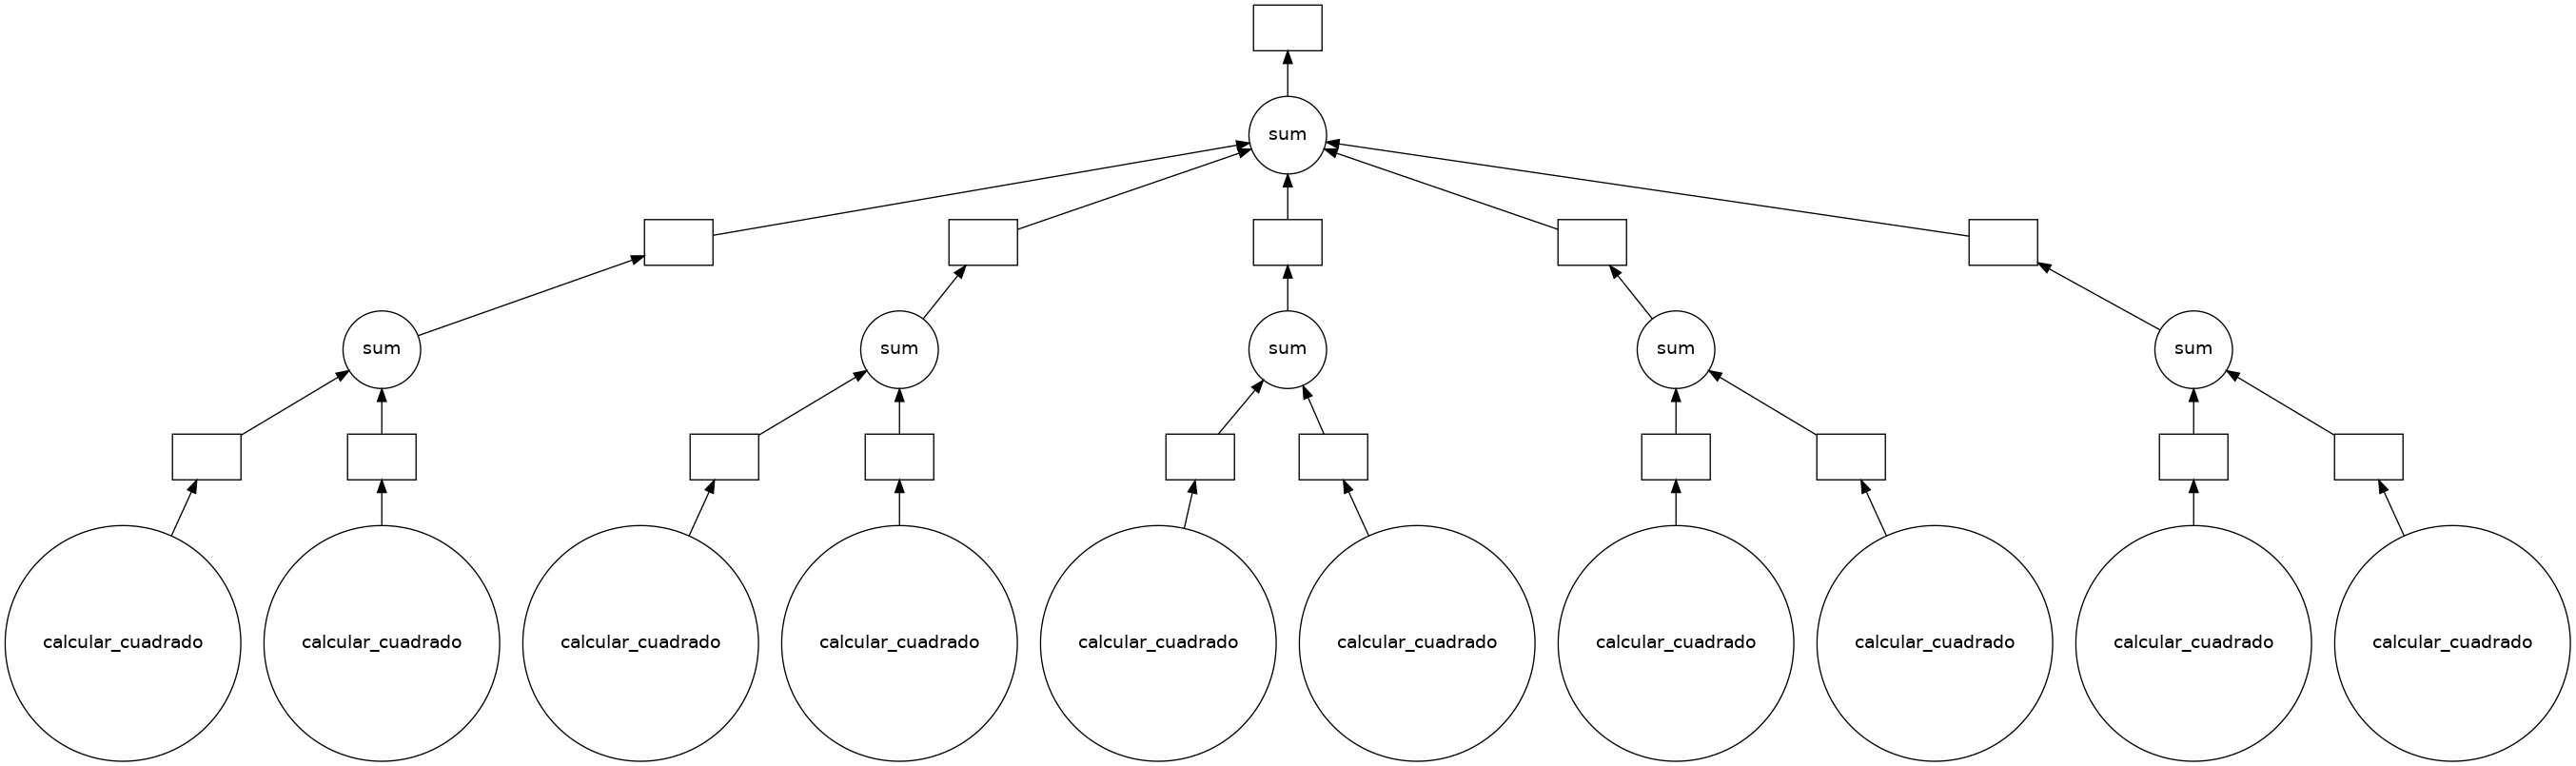

In [30]:
total.visualize()

In [29]:
import dask.dataframe as dd
df = dd.read_csv("./data/Test.csv")
df.compute()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
